'stacking_workflow_flowchart.png'

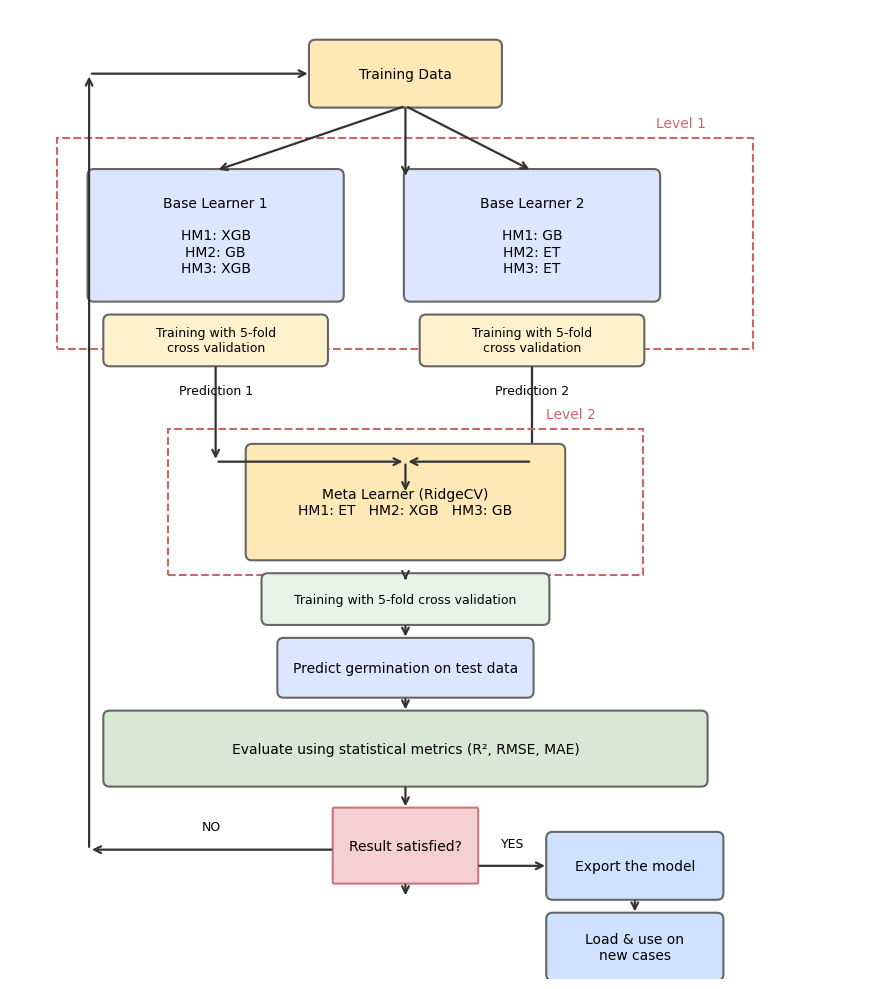

In [8]:
# Re-run after kernel reset
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch, Rectangle

fig, ax = plt.subplots(figsize=(9, 10))
ax.set_xlim(0, 11)
ax.set_ylim(0, 12)
ax.axis('off')

def rounded_box(x, y, w, h, text, fc="#fde8b6", ec="#666", lw=1.5, fontsize=10):
    box = FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.02,rounding_size=0.08",
                         linewidth=lw, edgecolor=ec, facecolor=fc)
    ax.add_patch(box)
    ax.text(x+w/2, y+h/2, text, ha='center', va='center', fontsize=fontsize)
    return box

def dashed_round_rect(x, y, w, h, label):
    rect = Rectangle((x, y), w, h, fill=False, linestyle='--', linewidth=1.5, edgecolor="#cc6666")
    ax.add_patch(rect)
    ax.text(x+w-0.6, y+h+0.1, label, ha='right', va='bottom', fontsize=10, color="#cc6666")
    return rect

def arrow(p1, p2, text=None, fontsize=9, mutation_scale=12):
    arr = FancyArrowPatch(p1, p2, arrowstyle='->', lw=1.6, mutation_scale=mutation_scale, color="#333")
    ax.add_patch(arr)
    if text:
        ax.text((p1[0]+p2[0])/2, (p1[1]+p2[1])/2+0.2, text, ha='center', va='bottom', fontsize=fontsize)

# Training data
train_box = rounded_box(3.8, 10.8, 2.4, 0.8, "Training Data")

# Level 1 dashed area
dashed_round_rect(0.6, 7.8, 8.8, 2.6, "Level 1")

# Base learner 1
base1 = rounded_box(1.0, 8.4, 3.2, 1.6,
                    "Base Learner 1\n\nHM1: XGB\nHM2: GB\nHM3: XGB",
                    fc="#dbe7ff")

# Base learner 2
base2 = rounded_box(5.0, 8.4, 3.2, 1.6,
                    "Base Learner 2\n\nHM1: GB\nHM2: ET\nHM3: ET",
                    fc="#dbe7ff")

# Arrows from Training Data to base learners
arrow((5.0, 10.8), (2.6, 10.0))
arrow((5.0, 10.8), (6.6, 10.0))

# CV small boxes
cv1 = rounded_box(1.2, 7.6, 2.8, 0.6, "Training with 5‑fold\ncross validation", fc="#fff2cc", fontsize=9)
cv2 = rounded_box(5.2, 7.6, 2.8, 0.6, "Training with 5‑fold\ncross validation", fc="#fff2cc", fontsize=9)

# Predictions to meta
arrow((2.6, 7.6), (2.6, 6.4), "Prediction 1")
arrow((6.6, 7.6), (6.6, 6.4), "Prediction 2")

# Level 2 dashed area
dashed_round_rect(2.0, 5.0, 6.0, 1.8, "Level 2")

# Meta learner
meta = rounded_box(3.0, 5.2, 4.0, 1.4,
                   "Meta Learner (RidgeCV)\nHM1: ET   HM2: XGB   HM3: GB",
                   fc="#fde8b6")

# Meta CV
meta_cv = rounded_box(3.2, 4.4, 3.6, 0.6, "Training with 5‑fold cross validation", fc="#e6f4ea", fontsize=9)

# Predict on test
pred_test = rounded_box(3.4, 3.5, 3.2, 0.7, "Predict germination on test data", fc="#dbe7ff")

# Evaluate
eval_box = rounded_box(1.2, 2.4, 7.6, 0.9, "Evaluate using statistical metrics (R², RMSE, MAE)", fc="#d9e8d4")

# Decision diamond (approx as rounded rectangle)
diamond = FancyBboxPatch((4.1, 1.2), 1.8, 0.9, boxstyle="round,pad=0.02,rounding_size=0.02",
                         linewidth=1.5, edgecolor="#c77", facecolor="#f6d0d0")
ax.add_patch(diamond)
ax.text(5.0, 1.65, "Result satisfied?", ha='center', va='center', fontsize=10)

# Flow arrows down
arrow((5.0, 10.8), (5.0, 9.9))
arrow((2.6, 6.4), (5.0, 6.4))
arrow((6.6, 6.4), (5.0, 6.4))
arrow((5.0, 6.4), (5.0, 6.0))
arrow((5.0, 5.0), (5.0, 4.9))
arrow((5.0, 4.4), (5.0, 4.2))
arrow((5.0, 3.5), (5.0, 3.3))
arrow((5.0, 2.4), (5.0, 2.1))
arrow((5.0, 1.2), (5.0, 1.0))

# YES path -> export -> load
export_box = rounded_box(6.8, 1.0, 2.2, 0.8, "Export the model", fc="#cfe2ff")
load_box = rounded_box(6.8, 0.0, 2.2, 0.8, "Load & use on\nnew cases", fc="#cfe2ff")
arrow((5.9, 1.4), (6.8, 1.4), "YES")
arrow((7.9, 1.0), (7.9, 0.8))

# NO path -> back to training data
arrow((4.1, 1.6), (1.0, 1.6), "NO")
arrow((1.0, 1.6), (1.0, 11.2))
arrow((1.0, 11.2), (3.8, 11.2))

# Save
out_path = "stacking_workflow_flowchart.png"
plt.tight_layout()
plt.savefig(out_path, dpi=300, bbox_inches="tight")
out_path
